# Sentiment Analysis


### STEP-1 : IMPORT ALL REQUIRED MODULE

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import re
from wordcloud import WordCloud, STOPWORDS
import nltk
import math
import re
#from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
from textblob import TextBlob
#from nltk.stem import PorterStemmer 
#from nltk.tokenize import word_tokenize
#import nltk


### Step-2 : Import Required Datasets

In [3]:
df=pd.read_csv('/home/richul/Downloads/Internship/ML/MachineLearning-master/datasets/train_E6oV3lV.csv',index_col=False)
dfword=pd.read_csv('/home/richul/Downloads/Internship/ML/MachineLearning-master/datasets/words.csv')
print(df.head())
print(dfword.head())
print(dfword.tail())

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation
        Words sentiment
0     2-faced       neg
1     2-faces       neg
2    abnormal       neg
3     abolish       neg
4  abominable       neg
            Words sentiment
7071    surprised       pos
7072         love       pos
7073         glad       pos
7074          yum       pos
7075  interesting       pos


### Step-3 : Implementing WordCloud

In [3]:
df1=df.copy()
df2=df.copy()
pos=df1[df1['label']==0]
neg=df2[df2['label']==1]

Positive words


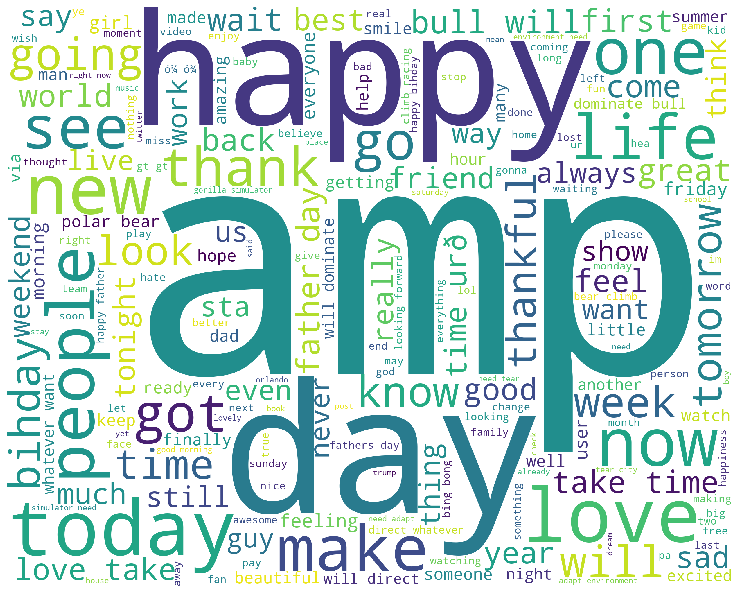

Negative words


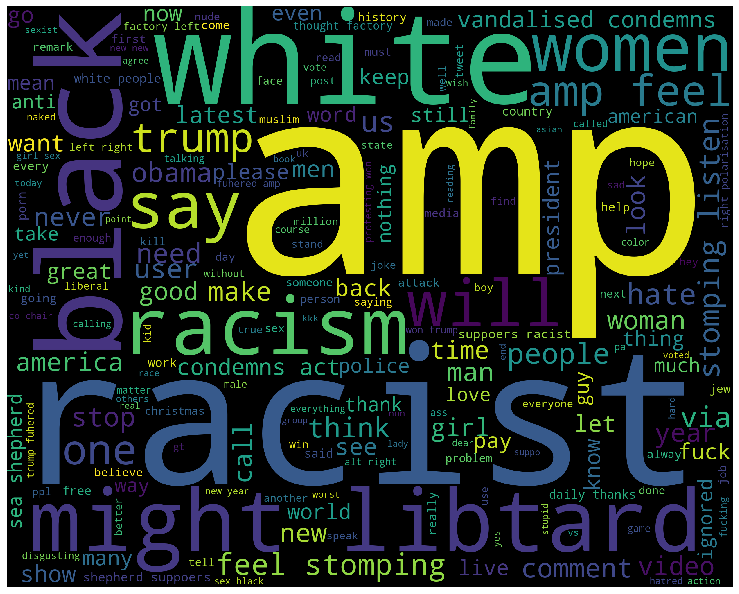

In [4]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(pos['tweet'],'white')
print("Negative words")
wordcloud_draw(neg['tweet'])

### Step-4 : Plot the Graph

In [ ]:
plt.scatter(dfword['Words'],dfword['sentiment'])

#https://www.speckbit.com/roadmap/data-wrangling/5/1


### Step-5 : Pre-Processing The Data

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

dfword['sentiment']=le.fit_transform(dfword['sentiment'])


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(dfword['Words'])
# printing all the words 
print(vectorizer.vocabulary_)
# encoding the document
vector = vectorizer.transform(dfword['Words'])
# summary of the encoded vector

print(vector.shape)
print(type(vector))
print(vector.toarray())

{'faced': 2244, 'faces': 2245, 'abnormal': 1, 'abolish': 2, 'abominable': 3, 'abominably': 4, 'abominate': 5, 'abomination': 6, 'abort': 7, 'aborted': 8, 'aborts': 9, 'abrade': 12, 'abrasive': 13, 'abrupt': 14, 'abruptly': 15, 'abscond': 16, 'absence': 17, 'absent': 18, 'minded': 4066, 'absentee': 19, 'absurd': 20, 'absurdity': 21, 'absurdly': 22, 'absurdness': 23, 'abuse': 26, 'abused': 27, 'abuses': 28, 'abusive': 29, 'abysmal': 30, 'abysmally': 31, 'abyss': 32, 'accidental': 35, 'accost': 47, 'accursed': 50, 'accusation': 51, 'accusations': 52, 'accuse': 53, 'accuses': 54, 'accusing': 55, 'accusingly': 56, 'acerbate': 57, 'acerbic': 58, 'acerbically': 59, 'ache': 60, 'ached': 61, 'aches': 62, 'achey': 63, 'aching': 68, 'acrid': 69, 'acridly': 70, 'acridness': 71, 'acrimonious': 72, 'acrimoniously': 73, 'acrimony': 74, 'adamant': 77, 'adamantly': 78, 'addict': 81, 'addicted': 82, 'addicting': 83, 'addicts': 84, 'admonish': 94, 'admonisher': 95, 'admonishingly': 96, 'admonishment': 97

### Step-6 : Train the Model 

In [6]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
fm=vector
tv=dfword['sentiment']
print(fm.shape)

print(tv.shape)

(7076, 6865)
(7076,)


In [7]:
model.fit(X=fm,y=tv)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(fm,tv)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Step-7 : Remove Patterns from Tweets

In [9]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    
    return input_txt

### Step-8 : Predict the Model 

In [10]:
def predictMe(data,text):
    resulta=[]
    resultb=[]
    vala=[]
    valb=[]
    valc=[]
    data['cleaned_text'] = np.vectorize(remove_pattern)(data[text], "@[\\w]*") #removes all tags to friend accounts
    data['cleaned_text'] = data['cleaned_text'].str.replace("[#]"," ") #removes hashtags
    data['cleaned_text'] = data['cleaned_text'].str.replace("[^a-zA-Z#]", " ") #removes special symbols
    #data['cleaned_text'] = data['cleaned_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) #remove all words with length less than 3


    
    for i in data['cleaned_text']:
        n=[i]
        vector1 = vectorizer.transform(n)
        #print(vector1.toarray())
        fm1=vector1
        a=model.predict(fm1)
        if 1 in a:
            resulta.append('Positive')
        else:
            resulta.append('Negative')
        vala.append(a[0])
        b=classifier.predict(fm1)
        if 1 in b:
            resultb.append('Positive')
        else:
            resultb.append('Negative')
        valb.append(b[0]/10)
    data['LogisticRegression?']=resulta
    data['RandomForest?']=resultb
    
    tw = df[['cleaned_text']]
    def detect_polarity(cleaned_text):
        return TextBlob(cleaned_text).sentiment.polarity
    df['Textblobs?'] = tw.cleaned_text.apply(detect_polarity)
    valc=tw.cleaned_text.apply(detect_polarity)
    
    result=[]
    for i in df['Textblobs?']:
        if i<0:
            result.append('Negative')
        elif i>0:
            result.append('Positive')
        else:
            result.append('Neutral')
    df['Textblobs?']=result
    resultmain=[]
    df['Average']=(valb+valc)
    for i in df['Average']:
        if i<0:
            resultmain.append('Negative')
        elif 0<=i<=0.1:
            resultmain.append('Neutral')
        else:
            resultmain.append('Positive')
    df['Our Model?']=resultmain

### Alternative Code :  
    tokenized_tweet = df['cleaned_text'].apply(lambda x: x.split())
    print(tokenized_tweet.head())
    stemmer = PorterStemmer()
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 

In [11]:
predictMe(df,'tweet')

### Step-9 : Display the output 

In [12]:
df

,id,label,tweet,cleaned_text,LogisticRegression?,RandomForest?,Textblobs?,Average,Our Model?
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,Negative,Negative,Negative,-0.5,Negative
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause th...,Positive,Positive,Positive,0.3,Positive
2,3,0,bihday your majesty,bihday your majesty,Negative,Positive,Neutral,0.1,Neutral
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...,Positive,Positive,Positive,0.6,Positive
4,5,0,factsguide: society now #motivation,factsguide society now motivation,Negative,Negative,Neutral,0.0,Neutral
...,...,...,...,...,...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu ...,Negative,Negative,Neutral,0.0,Neutral
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...,Positive,Positive,Positive,0.5,Positive
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...,Positive,Positive,Negative,-0.4,Negative
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised in in calgary wso...,Negative,Negative,Neutral,0.0,Neutral


### Step - 10 : Comparision of Results


In [13]:
def accuracy(model):
    accurate=0
    neutral=0
    total=len(df)
    for i,j in zip(df['label'],df[model]):
        if(j=='Neutral'):
            neutral+=1
        elif(i==0 and j=='Positive'):
            accurate+=1
        elif(i==1 and j=='Negative'):
            accurate+=1
    accuracy=(accurate+neutral)/(total)*100
    return accuracy

<Figure size 28800x16000 with 0 Axes>

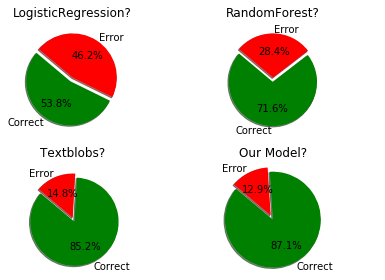

In [26]:
import matplotlib.pyplot as plt
# Data to plot
fig = plt.figure(figsize=(18,10), dpi=1600)
fig, axs = plt.subplots(2, 2)
labels = [('LogisticRegression?',0,0),('RandomForest?',0,1),('Textblobs?',1,0),('Our Model?',1,1)]
for i,a,b in labels:
    labels=['Correct','Error']
    sizes = [accuracy(i),100-accuracy(i)]
    colors = ['green','red']
    explode = (0.1, 0)  # explode 1st slice

    # Plot
    axs[a,b].set_title(i)
    axs[a,b].pie(sizes, explode=explode, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
fig.tight_layout()
plt.savefig('Comparision.svg', format='svg',dpi=1600)
plt.show()